# Разработка модели машинного обучения для компании «Работа с заботой»

<b>Описание проекта</b>: Компания «Работа с заботой» обратилась с просьбой построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. И постороить ещё одну модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

<b>Цель проекта:</b> Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. И постороить ещё одну модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

<b>Ход проекта:</b>

<b>Задача 1:</b>

* Загрузка данных
        Загрузка и изучение общей информации из предоставленных датасетов.    
* Предобработка данных
        Обработка пропущенных значений, корректировка типа даных, дубликатов.
* Исследовательский анализ данных
        Изучение основных параметров объектов, их распределения.
* Подготовка данных
        Используем пайпланы, осуществляем подготовку признаков
* Обучение моделей
        Обучаем две модели: логистическую регрессию и дерево решений. Проверяем качество на основе метрики SMAPE.
* Оформление выводов
        Выводы о том, какая модель справилась лучше.

<b>Задача 2:</b>

* Загрузка данных
        Загрузка и изучение общей информации из предоставленных датасетов.    
* Предобработка данных
        Обработка пропущенных значений, корректировка типа даных, дубликатов.
* Исследовательский анализ данных
        Изучение основных параметров объектов, их распределения.
* Добавление нового входного признака
        Добавление уровня удовлетворённости работой в датасет
* Подготовка данных
        Используем пайпланы, осуществляем подготовку признаков
* Обучение моделей
        Обучаем как миниму три модели, проверяем качество на метрике ROC-AUC
* Оформление выводов
        Формулируем выводы

In [1]:
!pip install phik -q
!pip install shap -q

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import phik
import shap

from phik.report import plot_correlation_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from shap import Explanation, PermutationExplainer
from shap.plots import waterfall, beeswarm

In [3]:
def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_pred - y_true) / ((np.abs(y_pred) + np.abs(y_true))/2))

## Задача 1

### Загрузка данных

In [4]:
X_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
X_test = pd.read_csv('/datasets/test_features.csv')
y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

#### X_train

In [5]:
X_train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


#### X_test

In [7]:
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


#### y_test

In [9]:
y_test.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [10]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


### Предобработка данных

#### X_train

In [11]:
X_train.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

<b>Пропуски в столбцах dept и level не заменить, потому что в них содержится информация об отделе, где работает сотрудник и уровень сотрудника.</b>

In [12]:
X_train.duplicated().sum()

0

<b>Явных дубликатов нет.</b>

In [13]:
X_train['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [14]:
X_train['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [15]:
X_train['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
X_train['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
X_train['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [18]:
X_train = X_train.replace(' ', np.nan, regex=True)

<b>Неявных дубликатов нет.</b>

#### X_test

In [19]:
X_test.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

<b>Та же ситуация, как и в X_train</b>

In [20]:
X_test.duplicated().sum()

0

<b>Явных дубликатов нет.</b>

In [21]:
X_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [22]:
X_test['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [23]:
X_test['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
X_test['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
X_test['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [26]:
X_test = X_test.replace(' ', np.nan, regex=True)

<b>Заменили пустые значения на nan</b>

#### y_test

In [27]:
y_test.isna().sum()

id                       0
job_satisfaction_rate    0
dtype: int64

In [28]:
y_test.duplicated().sum()

0

<b>Всё в порядке</b>

### Исследовательский анализ данных

#### Количественные признаки X_train

##### employment_years

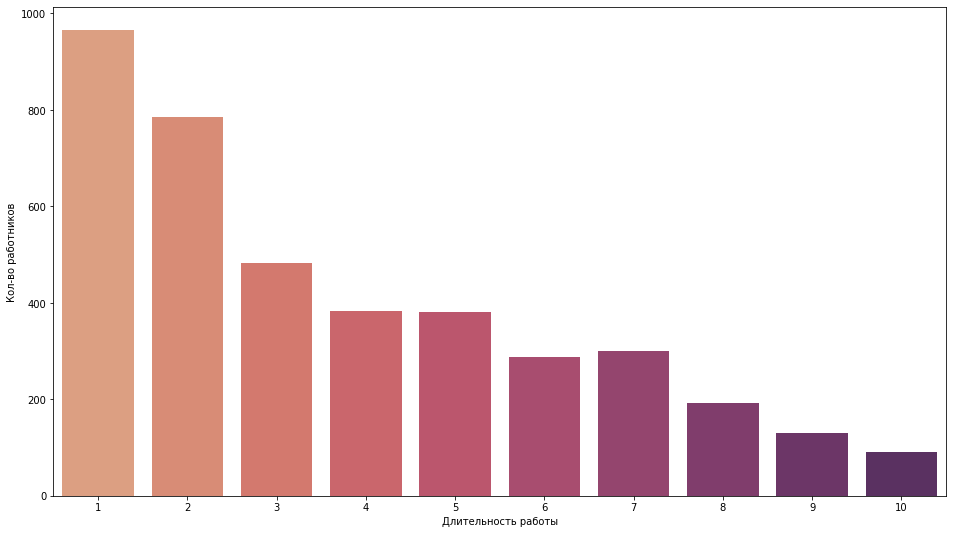

In [29]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_train['employment_years'].value_counts().index,
            y=X_train['employment_years'].value_counts()).set( xlabel='Длительность работы', ylabel='Кол-во работников');

<b>Больше всего сотрудников, которые работают в компании только год.</b>

##### supervisor_evaluation

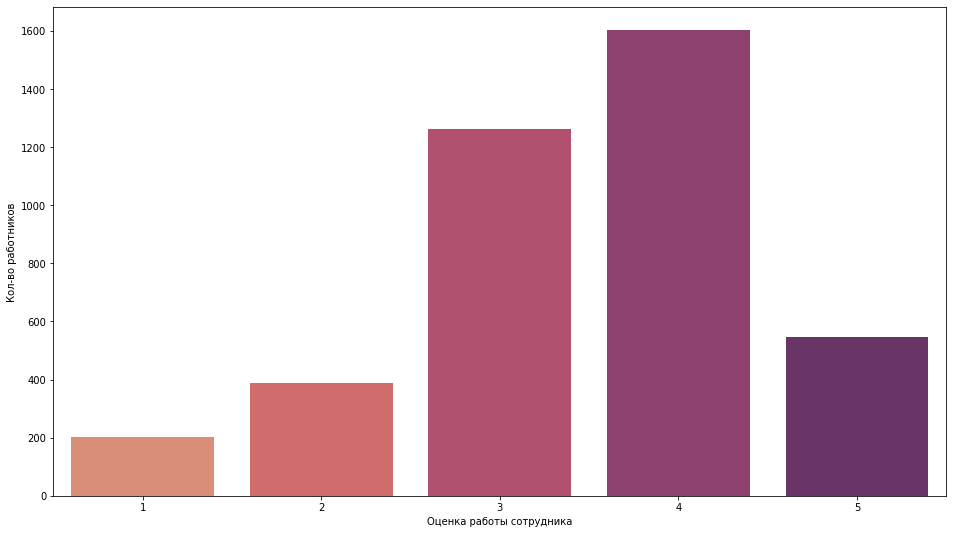

In [30]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_train['supervisor_evaluation'].value_counts().index,
            y=X_train['supervisor_evaluation'].value_counts()).set(xlabel='Оценка работы сотрудника', ylabel='Кол-во работников');

<b>Больше всего сотрудников, оценка работы которых равняется 4.</b>

##### salary

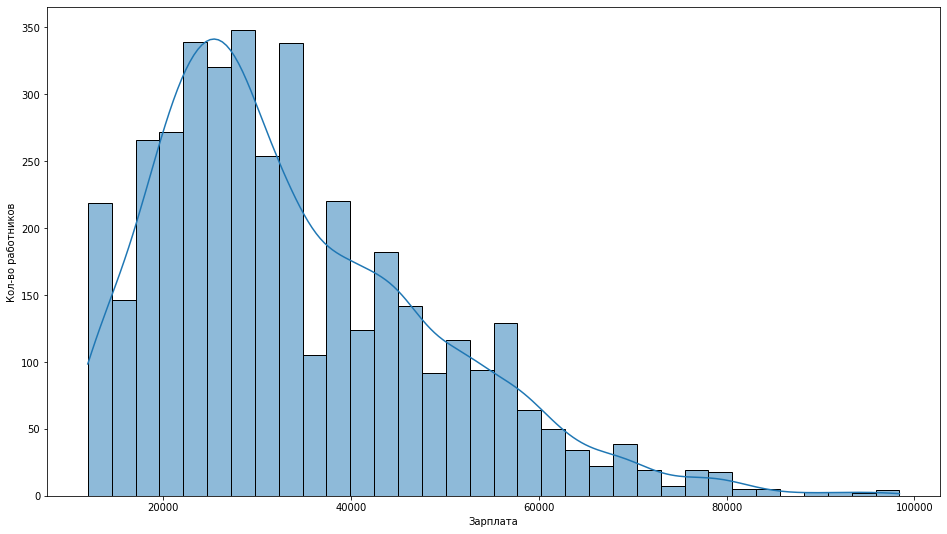

In [31]:
plt.figure(figsize=(16, 9))
sns.histplot(data=X_train, x="salary", kde=True).set(xlabel='Зарплата', ylabel='Кол-во работников');

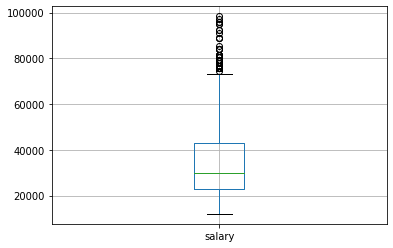

In [32]:
X_train.boxplot('salary');

<b>Распределение немного смещено влево, есть выбросы на boxplot, но мы их трогать не будем.</b>

##### job_satisfaction_rate

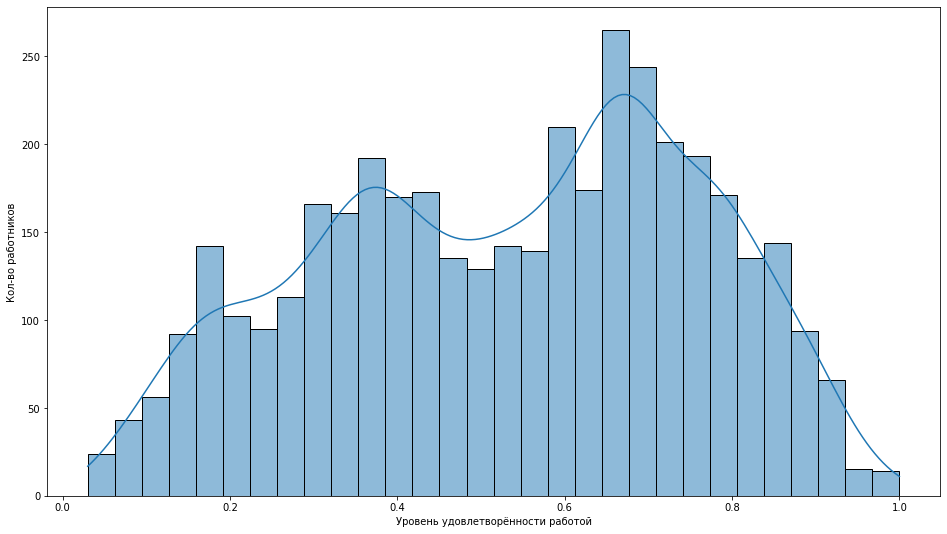

In [33]:
plt.figure(figsize=(16, 9))
sns.histplot(data=X_train, x="job_satisfaction_rate", kde=True, bins=30).set(xlabel='Уровень удовлетворённости работой', ylabel='Кол-во работников');

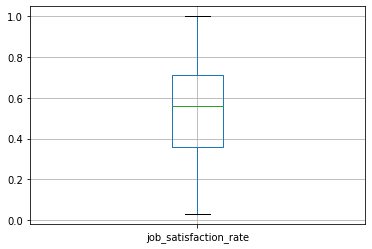

In [34]:
X_train.boxplot('job_satisfaction_rate');

<b>Данные распределены не совсем равномерно, есть небольшая "впадина", выбросов нет.</b>

In [35]:
X_train.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


#### Категориальные признаки X_train

##### dept

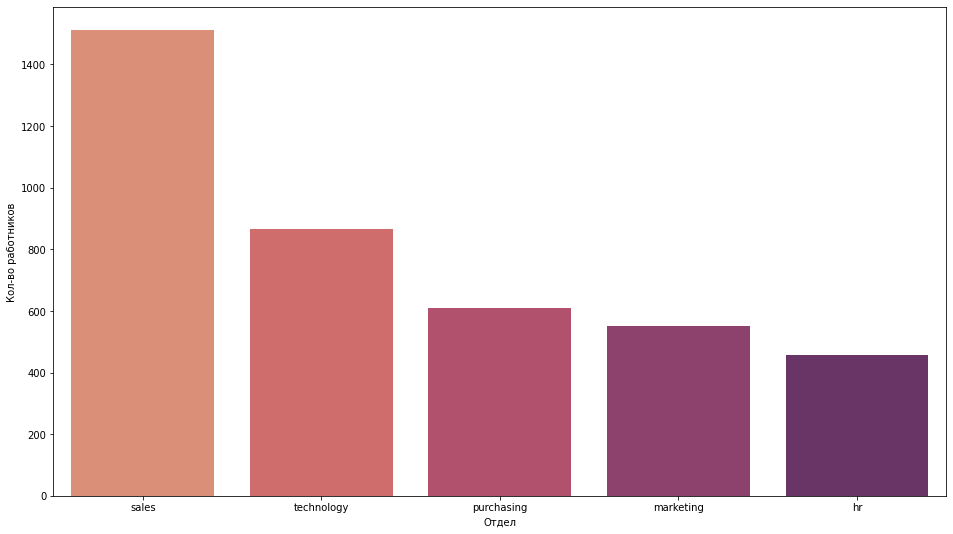

In [36]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_train['dept'].value_counts().index,
            y=X_train['dept'].value_counts()).set(xlabel='Отдел', ylabel='Кол-во работников');

<b>Больше всего сотрудников работают в отделе продаж.</b>

##### level

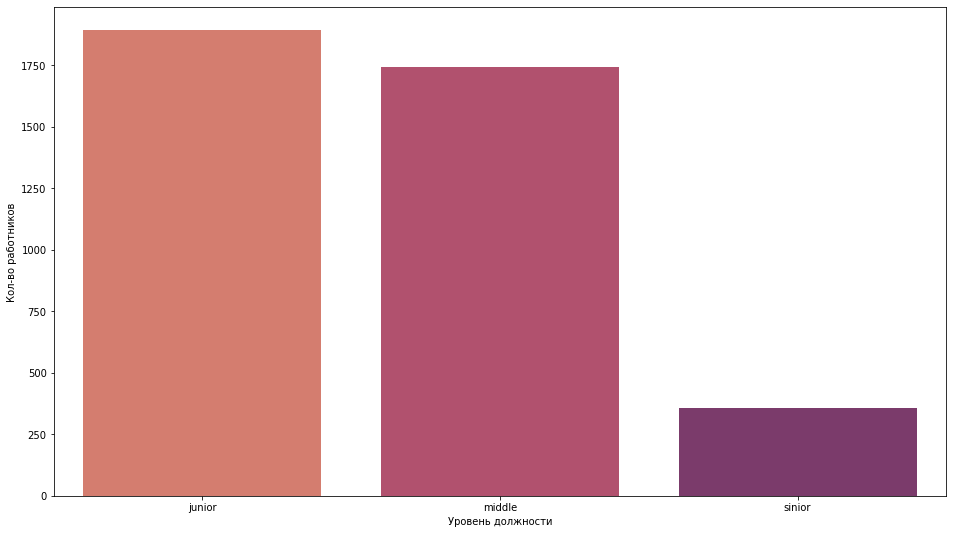

In [37]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_train['level'].value_counts().index,
            y=X_train['level'].value_counts()).set(xlabel='Уровень должности', ylabel='Кол-во работников');

<b>Больше всего сотрудников уровня junior и middle.</b>

##### last_year_promo

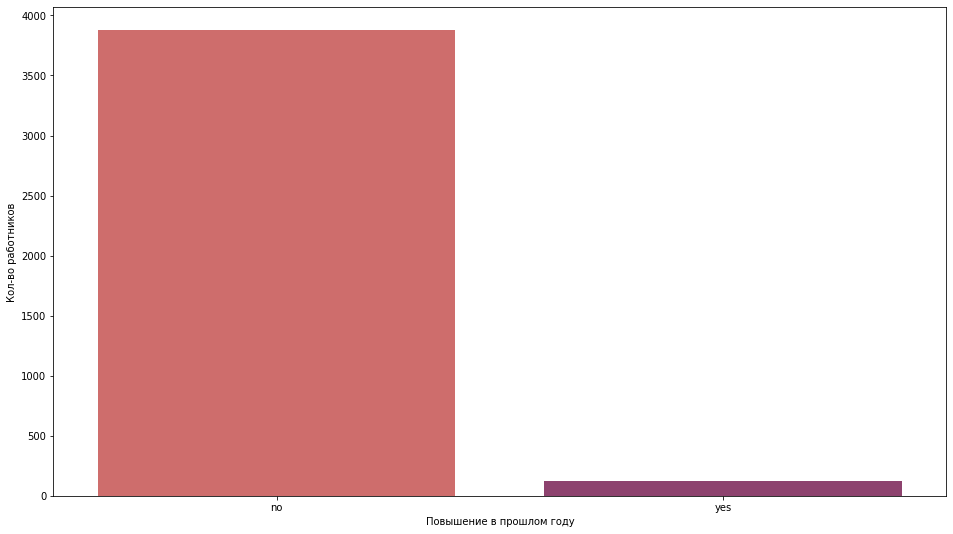

In [38]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_train['last_year_promo'].value_counts().index,
            y=X_train['last_year_promo'].value_counts()).set(xlabel='Повышение в прошлом году', ylabel='Кол-во работников');

<b>Большинство работников не были повышены в прошлом году.</b>

##### last_year_violations

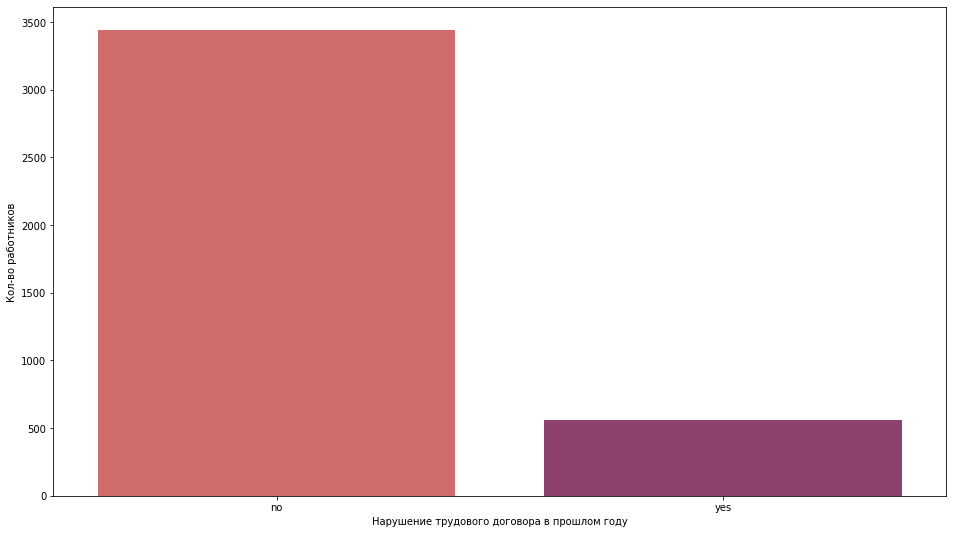

In [39]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_train['last_year_violations'].value_counts().index,
            y=X_train['last_year_violations'].value_counts()).set(xlabel='Нарушение трудового договора в прошлом году', ylabel='Кол-во работников');

<b>Большинство работников не нарушало трудовой договор в прошлом году.</b>

#### Количественные признаки X_test

##### employment_years

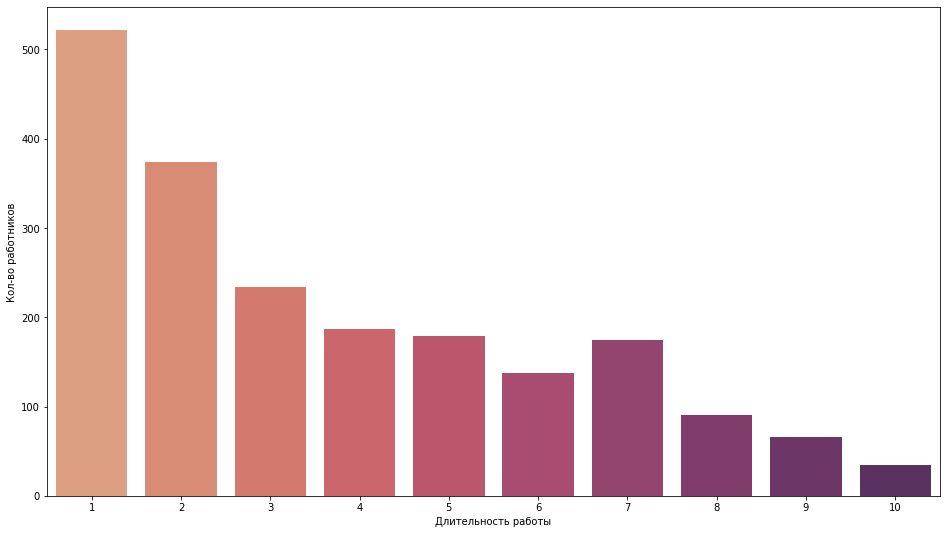

In [40]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_test['employment_years'].value_counts().index,
            y=X_test['employment_years'].value_counts()).set(xlabel='Длительность работы', ylabel='Кол-во работников');

<b>Примерно такая же картина, как и в X_train.</b>

##### supervisor_evaluation

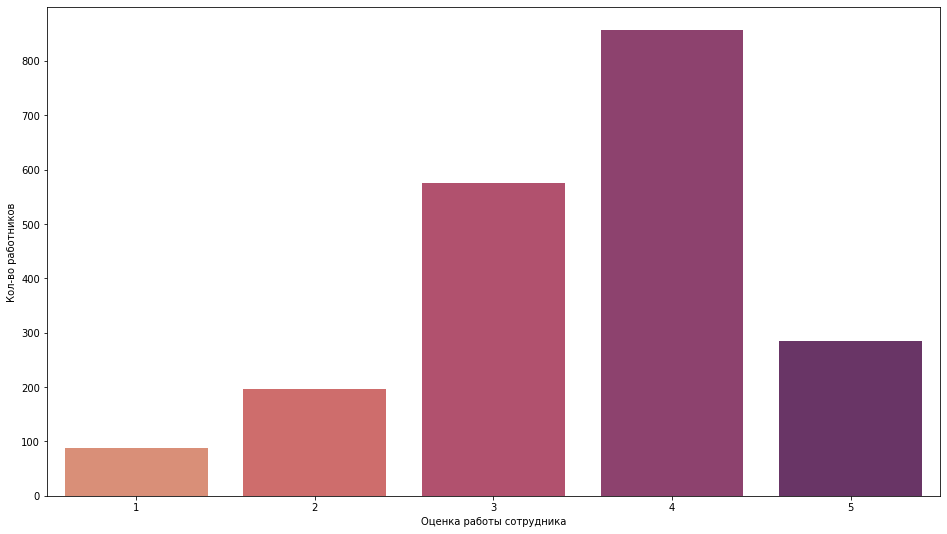

In [41]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_test['supervisor_evaluation'].value_counts().index,
            y=X_test['supervisor_evaluation'].value_counts()).set(xlabel='Оценка работы сотрудника', ylabel='Кол-во работников');

##### salary

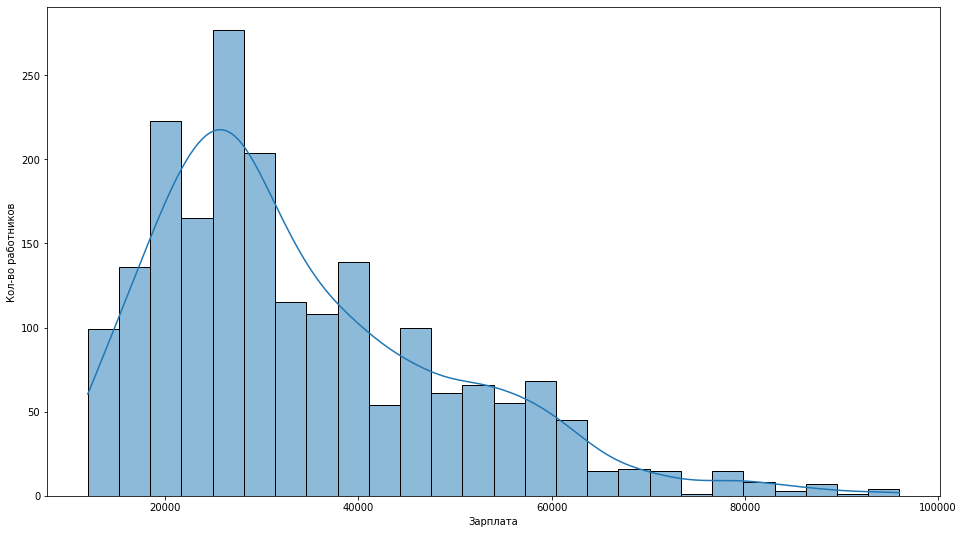

In [42]:
plt.figure(figsize=(16, 9))
sns.histplot(data=X_test, x="salary", kde=True).set(xlabel='Зарплата', ylabel='Кол-во работников');

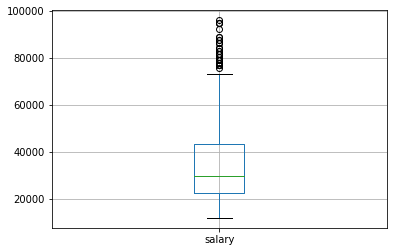

In [43]:
X_test.boxplot('salary');

<b>Данные в X_test распределены так же, как и в X_train.</b>

#### Категориальные признаки X_test

##### dept

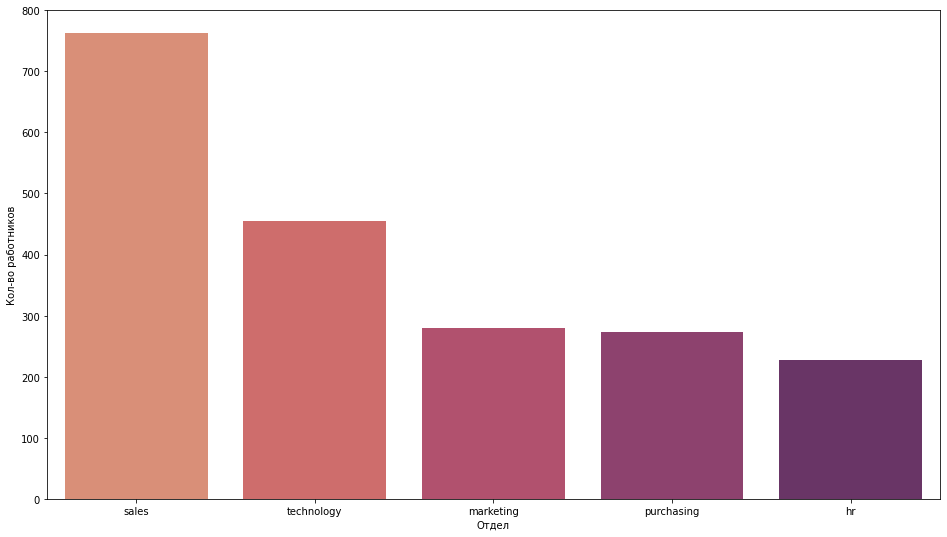

In [44]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_test['dept'].value_counts().index,
            y=X_test['dept'].value_counts()).set(xlabel='Отдел', ylabel='Кол-во работников');

##### level

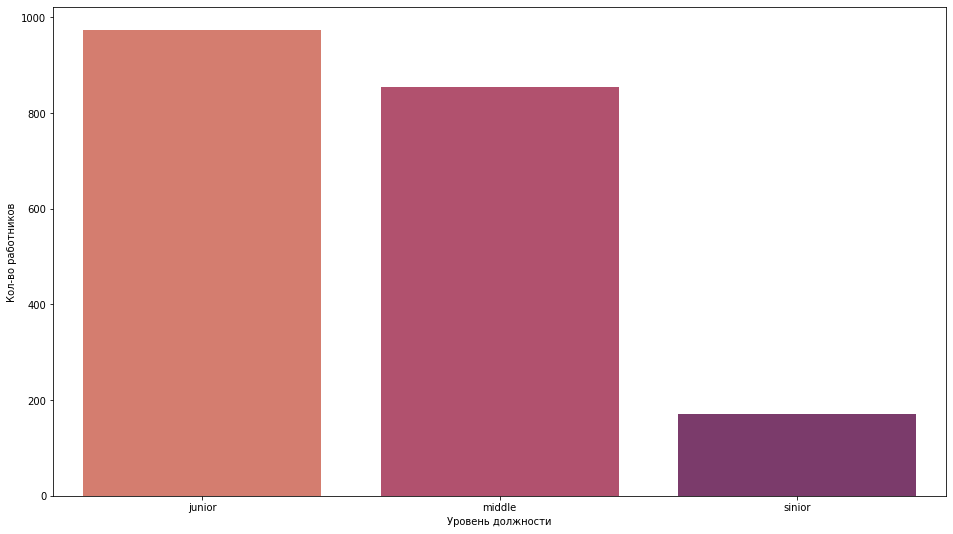

In [45]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_test['level'].value_counts().index,
            y=X_test['level'].value_counts()).set(xlabel='Уровень должности', ylabel='Кол-во работников');

##### last_year_promo

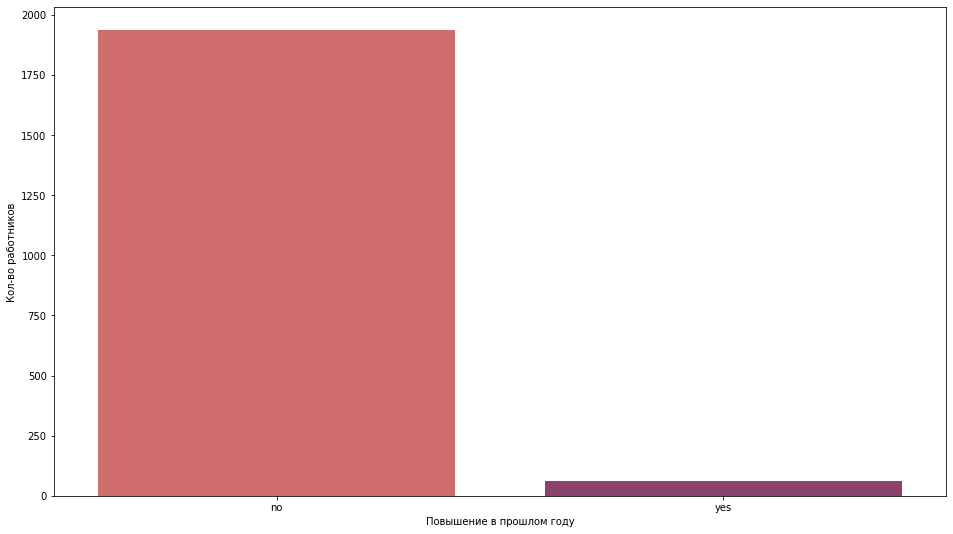

In [46]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_test['last_year_promo'].value_counts().index,
            y=X_test['last_year_promo'].value_counts()).set(xlabel='Повышение в прошлом году', ylabel='Кол-во работников');

##### last_year_violations

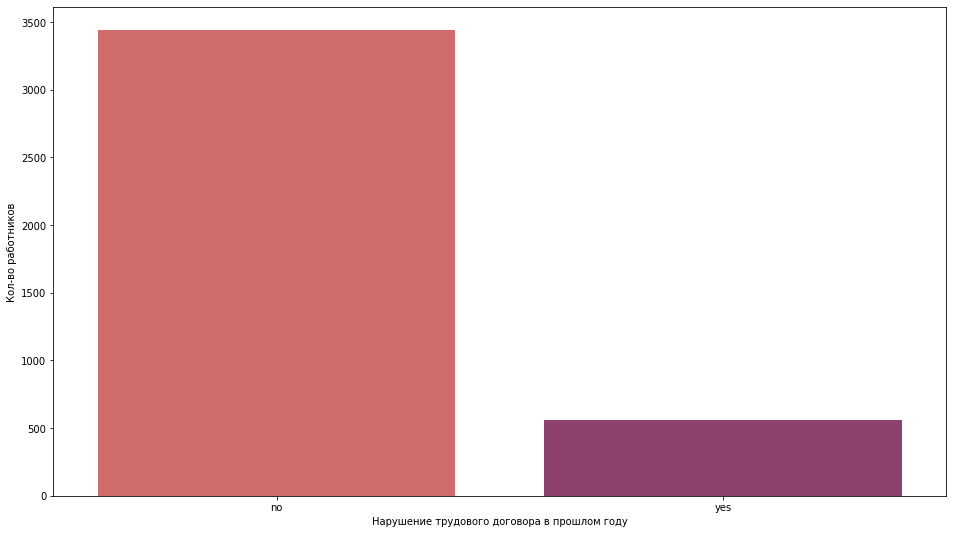

In [47]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_train['last_year_violations'].value_counts().index,
            y=X_train['last_year_violations'].value_counts()).set(xlabel='Нарушение трудового договора в прошлом году', ylabel='Кол-во работников');

<b>Категориальные признаки в X_test распределены так же, как и в X_train.</b>

#### y_test

##### job_satisfaction_rate

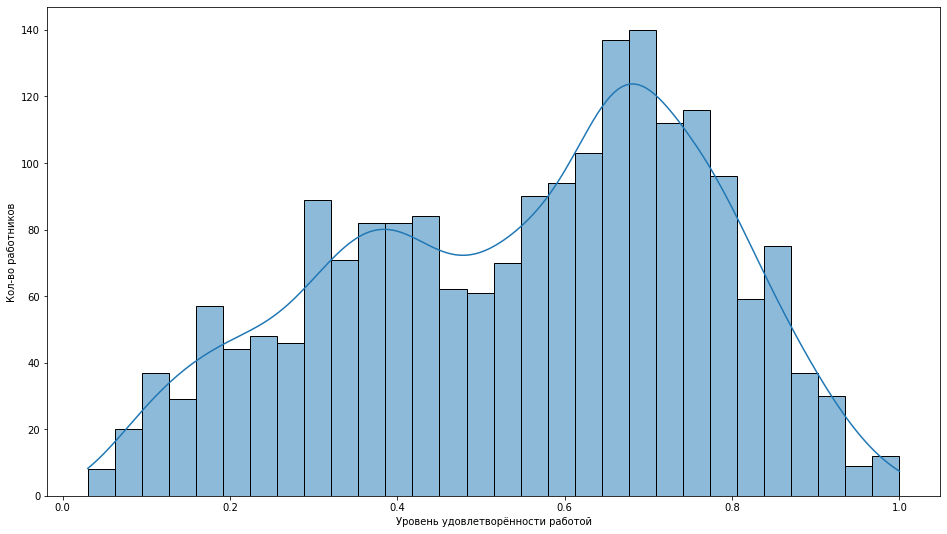

In [48]:
plt.figure(figsize=(16, 9))
sns.histplot(data=y_test, x="job_satisfaction_rate", kde=True, bins=30).set(xlabel='Уровень удовлетворённости работой', ylabel='Кол-во работников');

<b>Распределено так же, как и в X_train.</b>

#### Корелляция данных

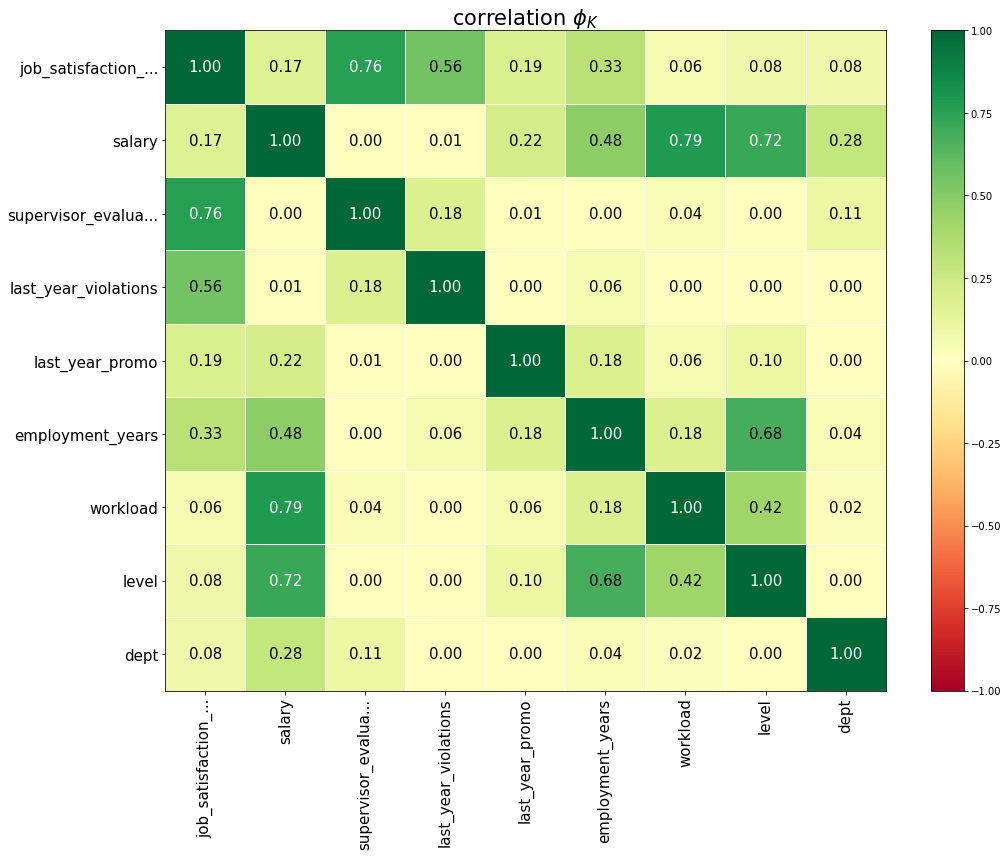

In [49]:
interval_cols = ['salary', 'job_satisfaction_rate']

phik_overview = X_train.drop('id', axis=1).phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

<b>Судя по матрице корелляции, уровень удовлетворения работой кореллирует больше всего с признаком "supervisor_evaluation" и  "last_year_violations". Мультиколлинеарности не обнаружено.</b>

<b>Вывод по ИАД:
    Мы рассмотрели распределения данных, данные выглядят в порядке. Рассмотрели матрицу корелляции, мультиколлинеарности не обнаружено.</b>

### Подготовка данных

<b>Используем кодировщики OneHotEncoder и OrdinalEncoder.</b>

In [50]:
ohe_columns = [
    'last_year_violations', 
    'last_year_promo', 
    'dept'
]
ord_columns = [
    'level', 
    'workload' 
]
num_columns = ['salary', 'employment_years', 'supervisor_evaluation']
RANDOM_STATE = 42

In [51]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse_output = False)
        )
    ]
)

In [52]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'] 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

In [53]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [54]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
)

<b>В этом шаге мы провели подготовку данных с помощью пайплайнов.</b>

### Обучение моделей

<b>Уберём id, потому что это не признак, он будет только мешать. И проверим датафрейм на дубликаты.</b>

In [55]:
X_train.set_index('id', inplace=True)
X_train.duplicated().sum()

245

In [56]:
X_train = X_train.drop_duplicates().reset_index(drop=True)
X_train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,medium,2,no,no,1,24000,0.58
1,hr,junior,high,2,no,no,5,38400,0.76
2,sales,junior,low,1,no,no,2,12000,0.11
3,technology,junior,low,4,no,no,2,18000,0.37
4,hr,junior,medium,1,no,no,3,22800,0.20


In [57]:
y_train = X_train['job_satisfaction_rate']
X_train = X_train.drop(['job_satisfaction_rate'], axis=1)

In [58]:
test = X_test.merge(y_test, on='id')

In [59]:
X_test_ = test.drop(['job_satisfaction_rate','id'], axis=1)
y_test_ = test['job_satisfaction_rate']
X_test_.shape

(2000, 8)

In [60]:
param_distributions = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 16),
        'models__max_features': range(2, 16),
        'models__min_samples_split': range(2, 16),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [61]:
smape_score = make_scorer(smape, greater_is_better=False)

In [62]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    cv=5,
    n_iter=20,
    scoring=smape_score,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               ['last_year_violations',
                                                                                'last_year_promo',
                                                                                'dept']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImp...
                                         'models__max_depth': range(2, 16),
                                         'models__max_features': range(2, 16),
                                         'models__min_samples_split': range(2, 16),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LinearRegression()],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [63]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['last_year_violations',
                                                   'last_year_promo', 'dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(str...
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', MinMaxScaler(),
                                                  ['salary', 'employment_years',
                                                   'supervisor_evaluation'])])),
                ('models',
                 DecisionTreeRegressor(max_depth=13, max_features=13,
                                       min_samples_split=8, random_state=42))])

In [64]:
randomized_search.best_score_*-1

15.227915623420056

In [65]:
y_pred = randomized_search.best_estimator_.predict(X_test_)
print(y_pred)
smape(y_test_.to_numpy(), y_pred)

[0.86333333 0.67041667 0.654      ... 0.17       0.51857143 0.528     ]


13.739908117885552

<b>Лучшая метрика на тренировочной выборке получилась 15.227915623420056, а у тестовой - 13.739908117885552, что отлично. Лучшей моделью оказалась DecisionTreeRegressor с параметрами max_depth=12, max_features=11, min_samples_split=4.</b>

In [66]:
results = pd.DataFrame(randomized_search.cv_results_)
results.mean_test_score = results.mean_test_score * -1
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__min_samples_split,param_models__max_features,param_models__max_depth,param_models,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032561,0.001466,0.013952,0.000114,MinMaxScaler(),3,7,14,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",-16.702380,-16.106987,-17.598344,-16.509963,-15.775677,16.538670,0.619523,8
1,0.025107,0.000781,0.012221,0.000541,passthrough,8,8,3,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",-23.227282,-21.992240,-23.706003,-22.693204,-21.839966,22.691739,0.711387,17
2,0.025869,0.001136,0.012353,0.000330,passthrough,6,4,11,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",-18.011402,-16.940674,-17.654498,-17.558093,-17.663699,17.565673,0.348383,12
3,0.030386,0.001184,0.013923,0.000892,MinMaxScaler(),10,13,10,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",-16.188378,-15.202047,-16.788726,-16.863940,-15.694004,16.147419,0.636501,6
4,0.030613,0.000316,0.013940,0.000472,MinMaxScaler(),9,12,11,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",-15.966564,-14.582865,-16.269861,-15.811534,-15.129028,15.551970,0.611992,4
5,0.031088,0.000818,0.013574,0.000575,MinMaxScaler(),4,11,12,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",-15.527770,-14.614527,-16.829928,-16.729814,-15.089200,15.758248,0.883321,5
6,0.025596,0.000643,0.012530,0.000190,MinMaxScaler(),3,13,2,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",-24.872716,-23.563314,-24.481130,-23.984685,-22.923678,23.965105,0.683583,18
7,0.027807,0.001037,0.014320,0.002425,MinMaxScaler(),7,9,9,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",-17.313055,-15.801478,-17.434377,-17.331004,-17.337567,17.043496,0.622447,11
8,0.034678,0.007123,0.014770,0.001131,MinMaxScaler(),13,8,11,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",-16.880318,-16.427040,-16.227525,-16.782608,-15.663652,16.396228,0.435823,7
9,0.024155,0.000779,0.011591,0.000369,passthrough,3,14,4,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",-21.641458,-20.724117,-22.637705,-21.792711,-20.808391,21.520876,0.704017,15


<b>Заметно, что при увеличении глубины дерева точность предсказаний увеличивается.</b>

<b>Вывод:
    
Мы постороили модель, которая может определять уровень удовлетворённости работника.  
    
После проведения обучения мы выбрали лучшую модель на основе метрики SMAPE. На тестовых данных у лучшей модели метрика была равна 15.172429392499627, что не отвечает критерию успешности. Намного хуже себя показала модель на тестовых данных, на них метрика была равна 49.017055.
    
    
Скорее всего, дерево решений показало себя лучше, чем линейная регрессия, потому что дерево решений = это намного более гибкая модель.</b>

## Задача 2

### Загрузка данных

In [67]:
X_train2 = pd.read_csv('/datasets/train_quit.csv')
X_test2 = pd.read_csv('/datasets/test_features.csv')
y_test2 = pd.read_csv('/datasets/test_target_quit.csv')

#### X_train2

In [68]:
X_train2

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


In [69]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


#### X_test2

In [70]:
X_test2

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [71]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


#### y_test2

In [72]:
y_test2

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
...,...,...
1995,836109,yes
1996,180999,yes
1997,746018,no
1998,247658,no


In [73]:
y_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


### Предобработка данных

#### X_train2

In [74]:
X_train2.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

<b>Пропуски в столбцах dept и level не заменить, потому что в них содержится информация об отделе, где работает сотрудник и уровень сотрудника.</b>

In [75]:
X_train2.duplicated().sum()

0

<b>Явных дубликатов нет.</b>

In [76]:
X_train2['dept'].unique()

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

In [77]:
X_train2['level'].unique()

array(['middle', 'junior', 'sinior'], dtype=object)

In [78]:
X_train2['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [79]:
X_train2['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [80]:
X_train2['workload'].unique()

array(['high', 'medium', 'low'], dtype=object)

In [81]:
X_train2 = X_train2.replace(' ', np.nan, regex=True)

<b>Неявных дубликатов не обнаружено.</b>

#### X_test2

In [82]:
X_test2.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [83]:
X_test2.duplicated().sum()

0

<b>Явных дубликатов нет.</b>

In [84]:
X_test2['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [85]:
X_test2['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [86]:
X_test2['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [87]:
X_test2['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [88]:
X_test2['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [89]:
X_test2 = X_test2.replace(' ', np.nan, regex=True)

### Исследовательский анализ данных

#### Количественные признаки X_train2

##### employment_years

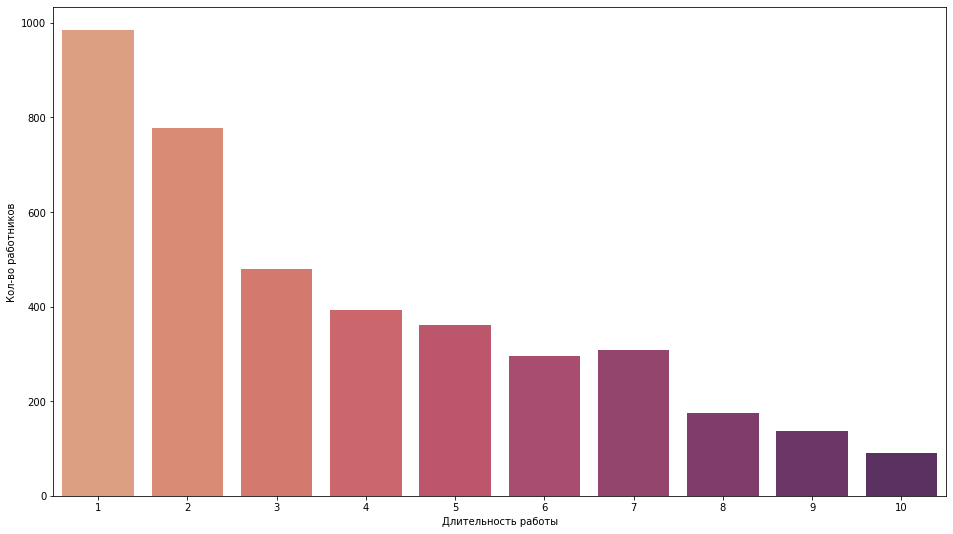

In [90]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_train2['employment_years'].value_counts().index,
            y=X_train2['employment_years'].value_counts()).set( xlabel='Длительность работы', ylabel='Кол-во работников');

##### supervisor_evaluation

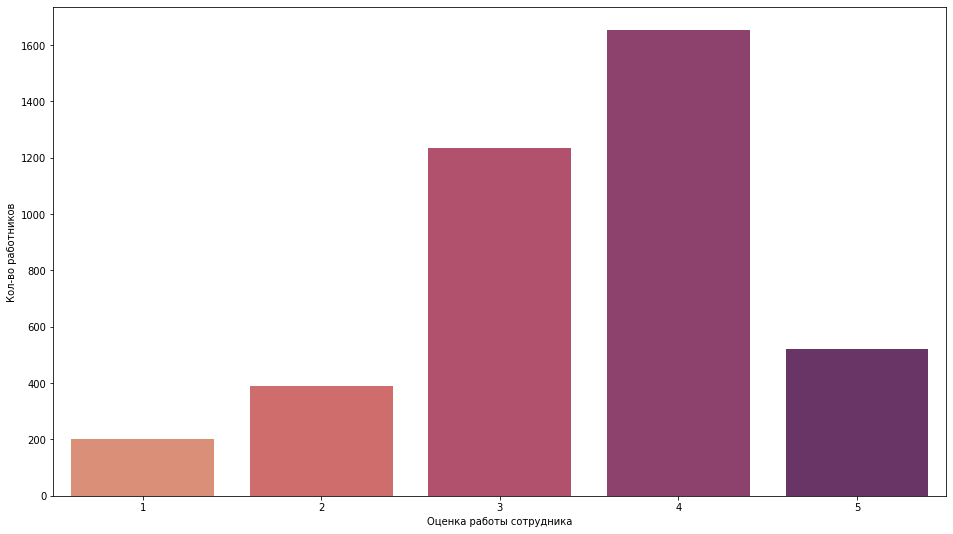

In [91]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_train2['supervisor_evaluation'].value_counts().index,
            y=X_train2['supervisor_evaluation'].value_counts()).set(xlabel='Оценка работы сотрудника', ylabel='Кол-во работников');

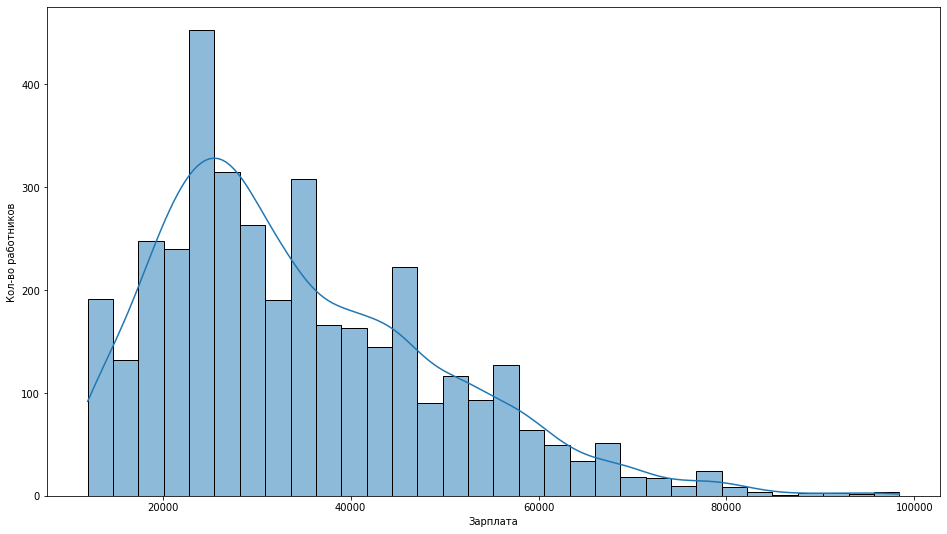

In [92]:
plt.figure(figsize=(16, 9))
sns.histplot(data=X_train, x="salary", kde=True).set(xlabel='Зарплата', ylabel='Кол-во работников');

<b>Это те же самые данные, что и в 1 задании. Посмотрим на распределение нового признака.</b>

#### Новый признак quit

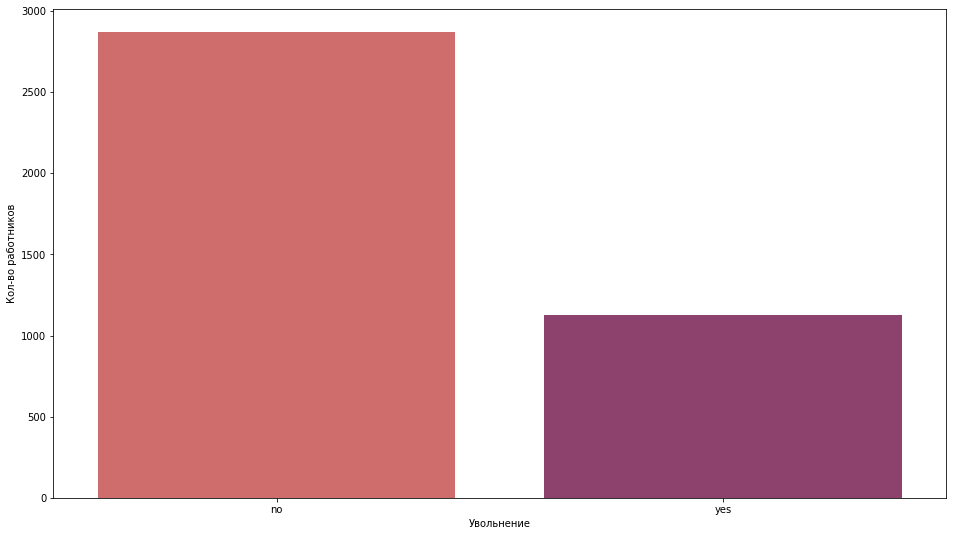

In [93]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=X_train2['quit'].value_counts().index,
            y=X_train2['quit'].value_counts()).set(xlabel='Увольнение', ylabel='Кол-во работников');

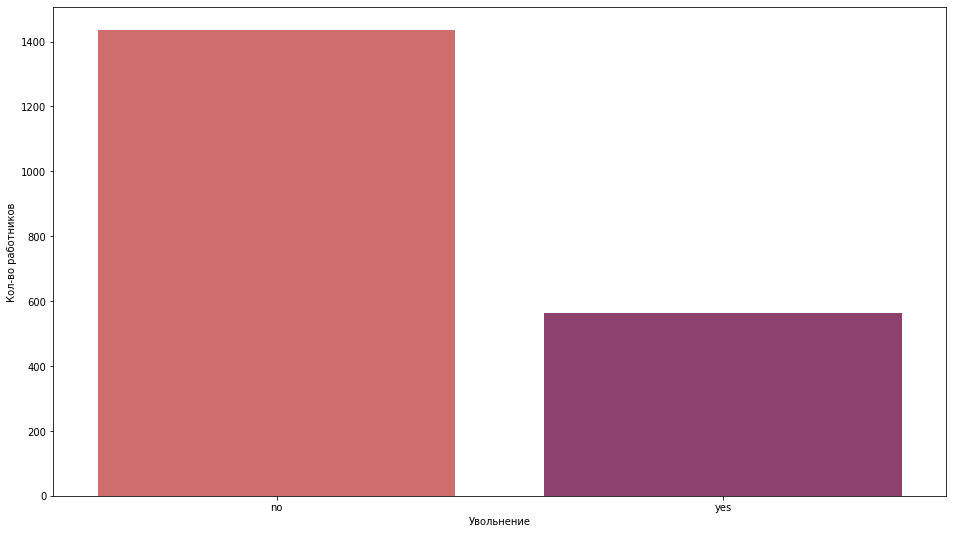

In [94]:
plt.figure(figsize=(16, 9))
sns.barplot(palette = 'flare',
            x=y_test2['quit'].value_counts().index,
            y=y_test2['quit'].value_counts()).set(xlabel='Увольнение', ylabel='Кол-во работников');

<b>Данные в тренировочной и тестовой выборке распределены примерно равномерно </b>

#### Составление портерта сотрудника

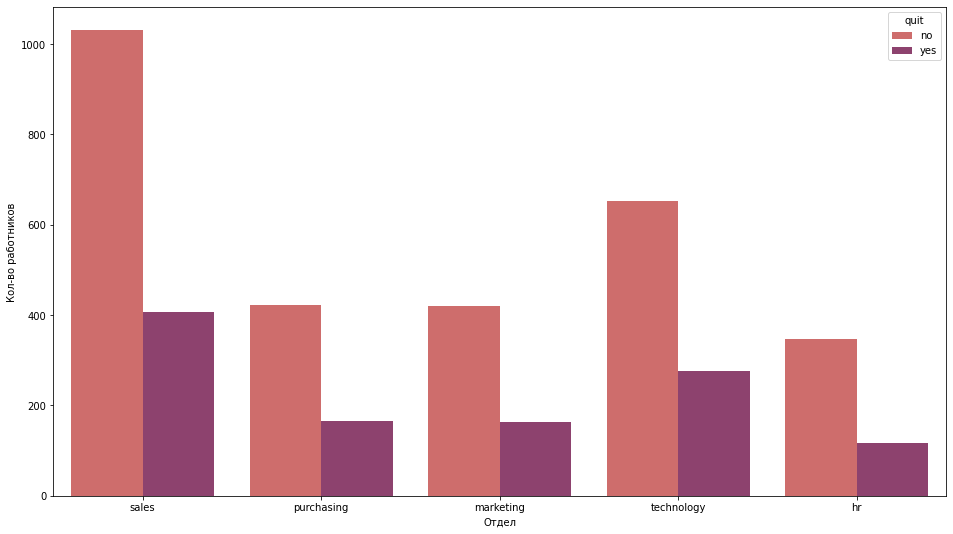

In [95]:
plt.figure(figsize=(16, 9))
sns.countplot(palette = 'flare',
            x='dept', data=X_train2, hue='quit').set(xlabel='Отдел', ylabel='Кол-во работников');

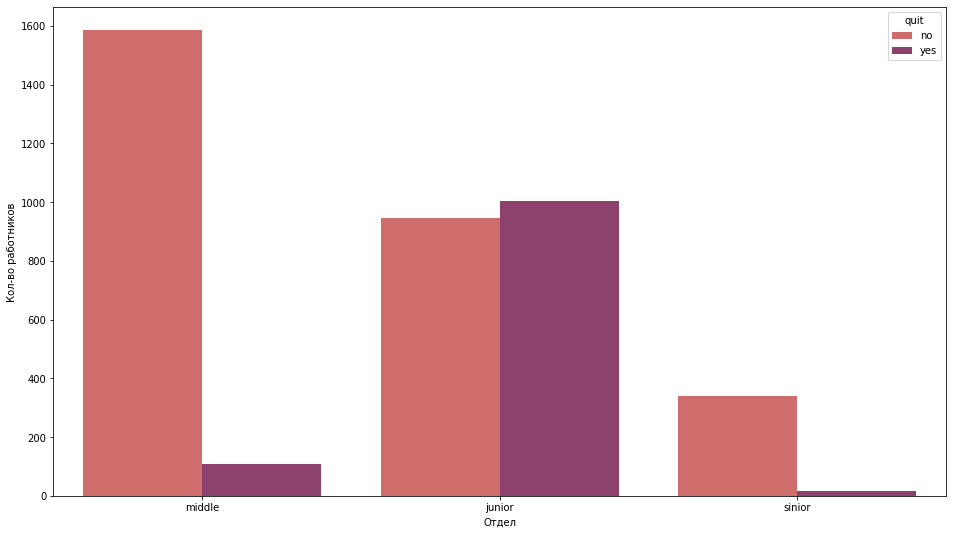

In [96]:
plt.figure(figsize=(16, 9))
sns.countplot(palette = 'flare',
            x='level', data=X_train2, hue='quit').set(xlabel='Отдел', ylabel='Кол-во работников');

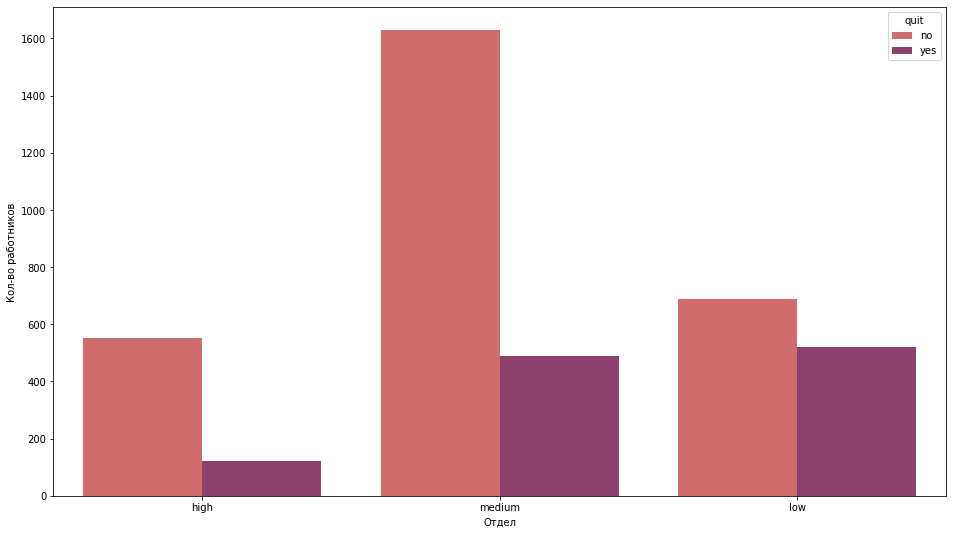

In [97]:
plt.figure(figsize=(16, 9))
sns.countplot(palette = 'flare',
            x='workload', data=X_train2, hue='quit').set(xlabel='Отдел', ylabel='Кол-во работников');

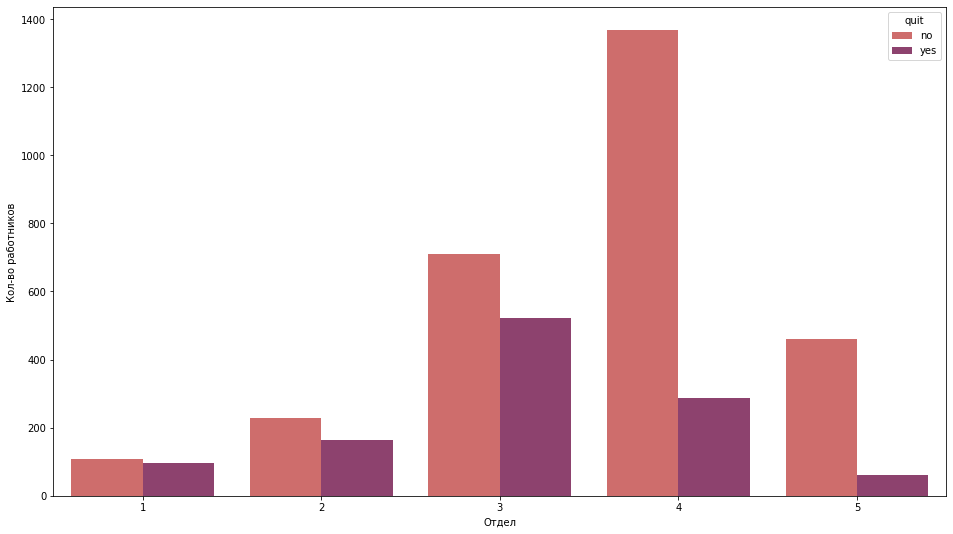

In [98]:
plt.figure(figsize=(16, 9))
sns.countplot(palette = 'flare',
            x='supervisor_evaluation', data=X_train2, hue='quit').set(xlabel='Отдел', ylabel='Кол-во работников');

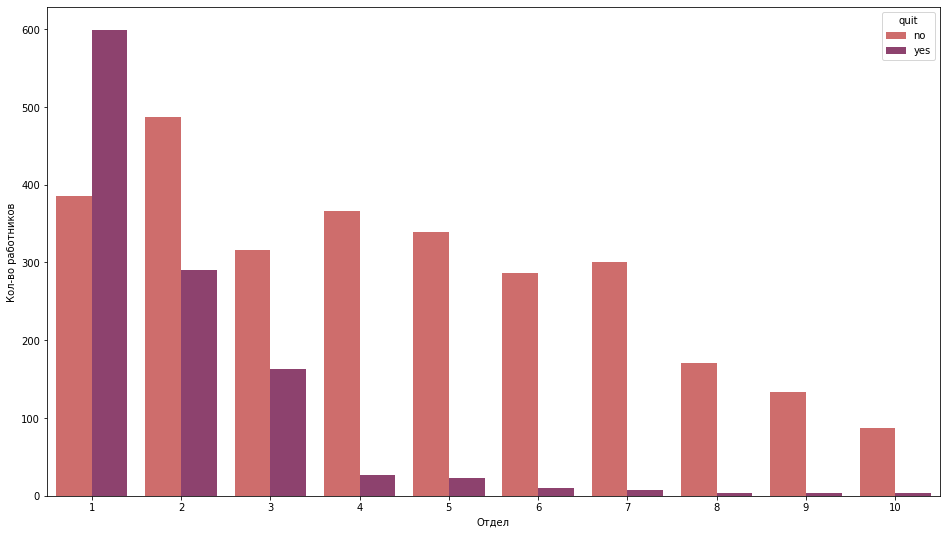

In [99]:
plt.figure(figsize=(16, 9))
sns.countplot(palette = 'flare',
            x='employment_years', data=X_train2, hue='quit').set(xlabel='Отдел', ylabel='Кол-во работников');

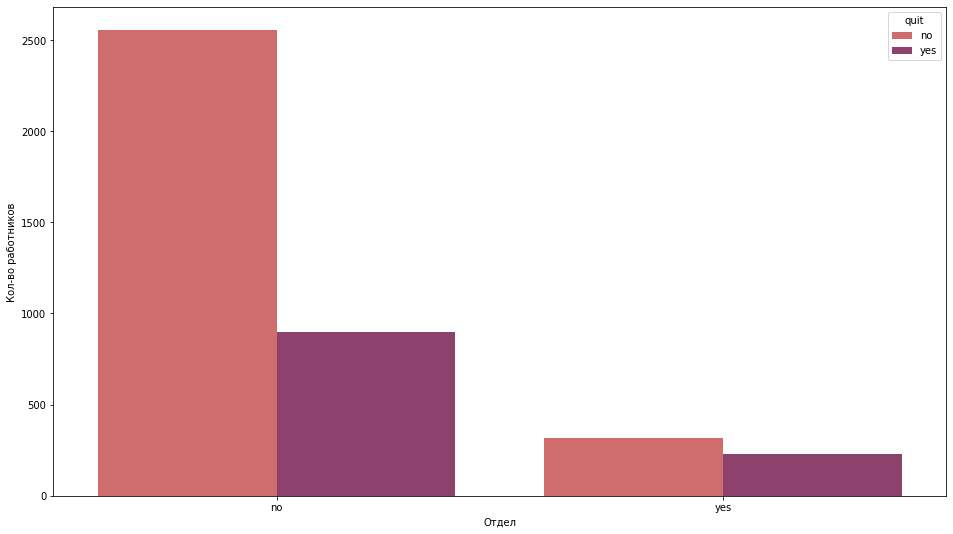

In [100]:
plt.figure(figsize=(16, 9))
sns.countplot(palette = 'flare',
            x='last_year_violations', data=X_train2, hue='quit').set(xlabel='Отдел', ylabel='Кол-во работников');

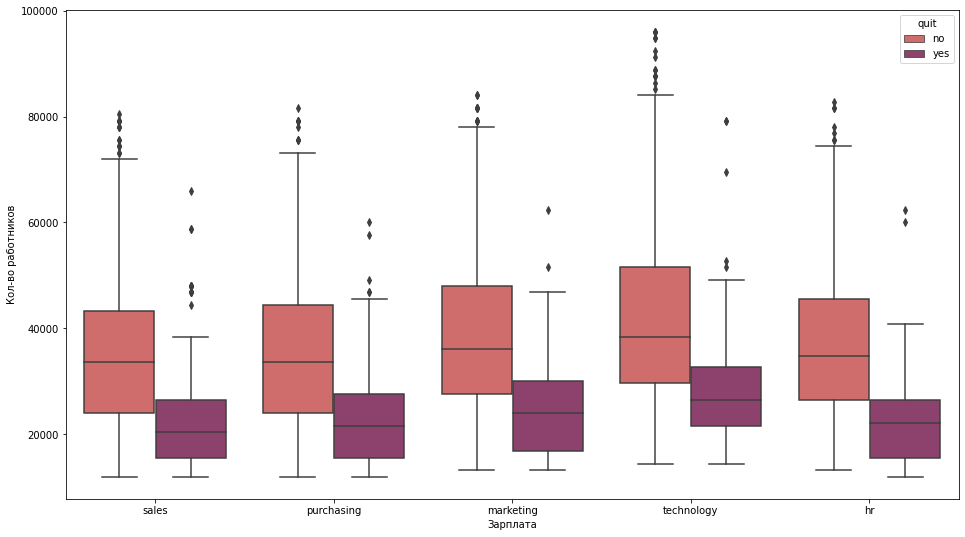

In [101]:
plt.figure(figsize=(16, 9))
sns.boxplot(palette = 'flare',
            x='dept', y = 'salary', data=X_train2, hue='quit').set(xlabel='Зарплата', ylabel='Кол-во работников');

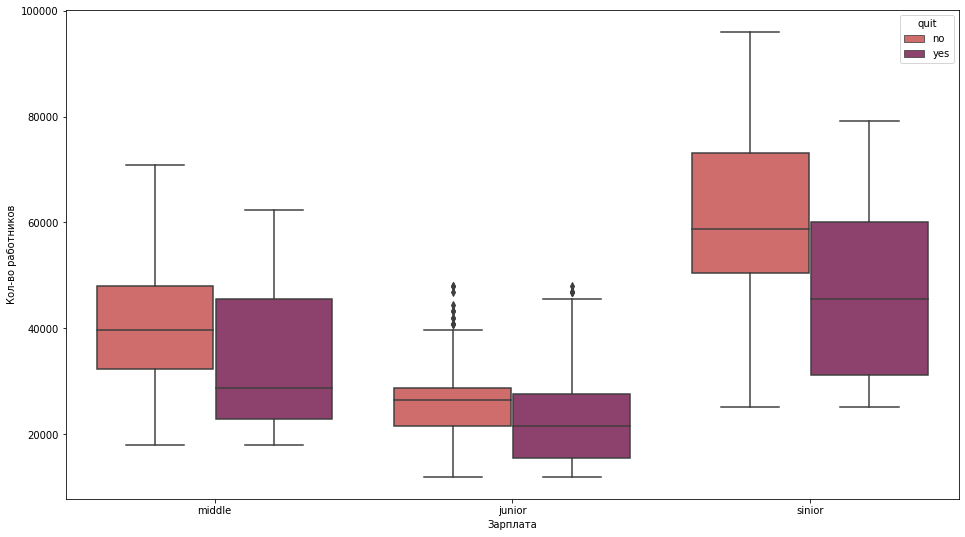

In [102]:
plt.figure(figsize=(16, 9))
sns.boxplot(palette = 'flare',
            x='level', y = 'salary', data=X_train2, hue='quit').set(xlabel='Зарплата', ylabel='Кол-во работников');

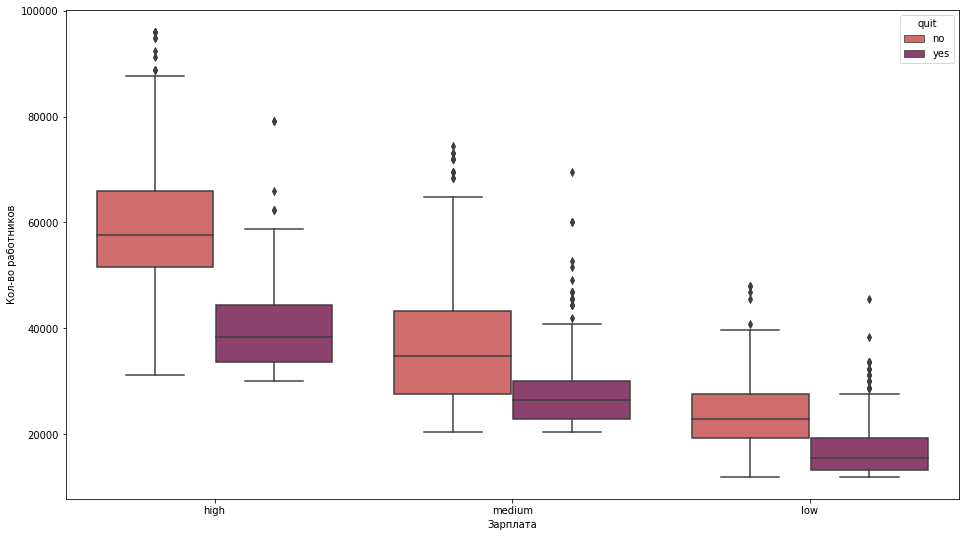

In [103]:
plt.figure(figsize=(16, 9))
sns.boxplot(palette = 'flare',
            x='workload', y = 'salary', data=X_train2, hue='quit').set(xlabel='Зарплата', ylabel='Кол-во работников');

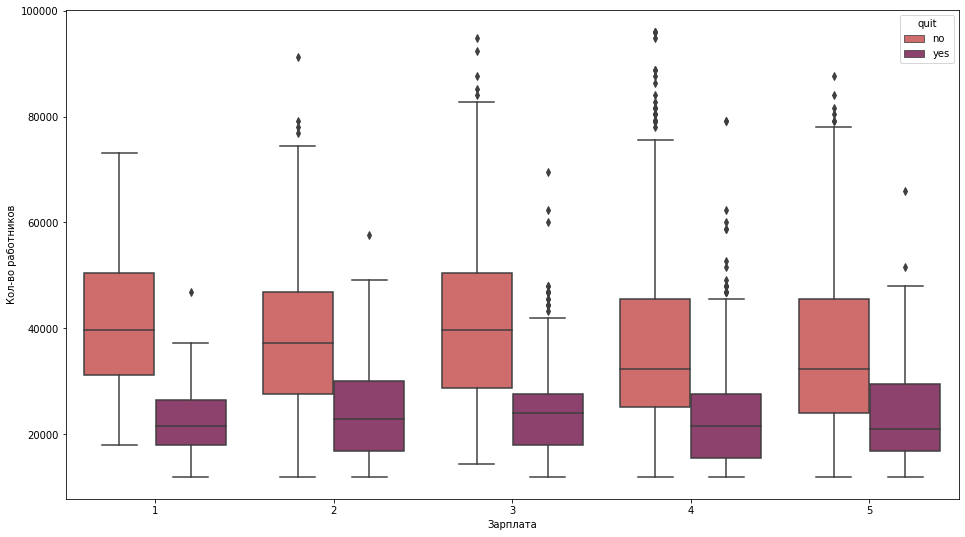

In [104]:
plt.figure(figsize=(16, 9))
sns.boxplot(palette = 'flare',
            x='supervisor_evaluation', y = 'salary', data=X_train2, hue='quit').set(xlabel='Зарплата', ylabel='Кол-во работников');

<b>Проанализировав графики, можно сказать, что больше всего увольняются сотрудники с уровнем junior, с низкой загруженностью и недавно работающие в компании. Во всех категориях средняя зарплата у уволенного сотрудника ниже, чем у сотрудника, который продолжил работать.

Портрет уволенного сотрудника: junior с низкой загруженностью, недавно пришедший работать в компанию, с низкой зарплатой.</b>

In [105]:
data = y_test.merge(y_test2, on='id')

In [106]:
data = data.set_index('id')

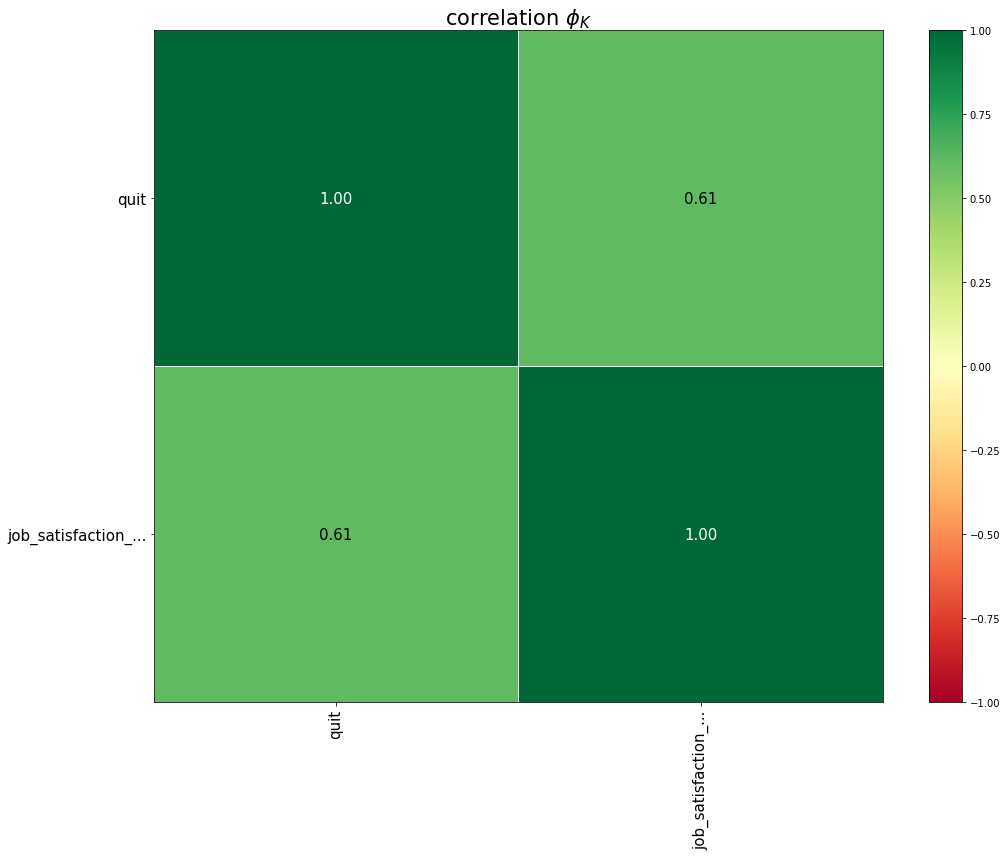

In [107]:
interval_cols = ['job_satisfaction_rate']

phik_overview = data.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

<b>Между увольнением и удовлетворённостью работой довольно большая корелляция. Нужно будет добавить этот признак.</b>

<b>Провели исследовательский анализ данных, посмотрели, как распределяется новый признак quit, сделали портерт уволенного сотрудника.</b>

### Добавление нового признака

In [108]:
X_test2['job_satisfaction_rate_pred'] = randomized_search.best_estimator_.predict(X_test2.drop('id', axis=1))

In [109]:
X_test2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred
0,485046,marketing,junior,medium,2,no,no,5,28800,0.863333
1,686555,hr,junior,medium,1,no,no,4,30000,0.670417
2,467458,sales,middle,low,5,no,no,4,19200,0.654000
3,418655,sales,middle,low,6,no,no,4,19200,0.655000
4,789145,hr,middle,medium,5,no,no,5,40800,0.824643


In [110]:
X_train2

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


In [111]:
X_train2['job_satisfaction_rate_pred'] = randomized_search.best_estimator_.predict(X_train2.drop(['id', 'quit'], axis=1))

In [112]:
X_train2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_pred
0,723290,sales,middle,high,2,no,no,4,54000,no,0.660000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.853529
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.364091
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000


### Подготовка данных

<b>Для нашего таргета будем использовать LabelEncoder</b>

In [113]:
X_train2.set_index('id', inplace=True)
X_train2.duplicated().sum()

1413

In [114]:
X_train2 = X_train2.drop_duplicates().reset_index(drop=True)
X_train2.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_pred
0,sales,middle,high,2,no,no,4,54000,no,0.660000
1,sales,junior,medium,2,no,no,4,27600,no,0.853529
2,purchasing,middle,medium,5,no,no,1,37200,no,0.364091
3,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,marketing,junior,medium,2,no,no,5,25200,no,0.690000


In [115]:
y_train2 = X_train2['quit']
X_train2 = X_train2.drop('quit', axis=1)

In [116]:
test_ = X_test2.merge(y_test2, on='id')

In [117]:
X_test2_ = test_.drop(['quit','id'], axis=1)
y_test2_ = test_['quit']
X_test2.shape

(2000, 10)

In [118]:
label_encoder = LabelEncoder()
y_train2 = label_encoder.fit_transform(y_train2)
y_test2_ = label_encoder.transform(y_test2_)

In [119]:
ohe_columns = [
    'last_year_violations', 
    'last_year_promo', 
    'dept'
]
ord_columns = [
    'level', 
    'workload' 
]
num_columns = ['salary', 'employment_years', 'supervisor_evaluation', 'job_satisfaction_rate_pred']

In [120]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse_output = False)
        )
    ]
)

In [121]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'] 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

In [122]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [123]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression(random_state=RANDOM_STATE))
    ]
)

<b>Мы закодировали наш таргет, подготовили пайплайны для работы.</b>

### Обучение моделей

In [124]:
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 16),
        'models__max_features': range(2, 16),
        'models__min_samples_split': range(2, 16),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__degree': range(1, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [125]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    cv=5,
    n_iter=20,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train2, y_train2)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               ['last_year_violations',
                                                                                'last_year_promo',
                                                                                'dept']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImp...
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__degree': range(1, 4),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'models__solver': ['newton-cg',
                                                            'lbfgs',
                                                            'liblinear', 'sag',
                                                            'saga'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [126]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['last_year_violations',
                                                   'last_year_promo', 'dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(str...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['salary', 'employment_years',
                                                   'supervisor_evaluation',
                                                   'job_satisfaction_rate_pred'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=4, max_features=13,
                                        min_samples_split=5,
                                        random_state=42))])

In [127]:
randomized_search.best_score_

0.9009966047392611

In [128]:
pd.DataFrame(randomized_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__min_samples_split,param_models__max_features,param_models__max_depth,param_models,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027426,0.005856,0.013777,0.003061,passthrough,4,6,14,DecisionTreeClassifier(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.783232,0.807937,0.854200,0.818841,0.819998,0.816842,0.022885,20
1,0.025521,0.000395,0.014924,0.002741,StandardScaler(),10,7,3,DecisionTreeClassifier(random_state=42),"{'preprocessor__num': StandardScaler(), 'model...",0.878750,0.889599,0.882579,0.883964,0.881531,0.883285,0.003591,3
2,0.025021,0.000661,0.013522,0.000436,StandardScaler(),8,3,11,DecisionTreeClassifier(random_state=42),"{'preprocessor__num': StandardScaler(), 'model...",0.864124,0.834152,0.860005,0.876953,0.870664,0.861180,0.014692,14
3,0.024995,0.001479,0.013297,0.002042,passthrough,11,12,10,DecisionTreeClassifier(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.862142,0.867921,0.867876,0.881027,0.856050,0.867003,0.008269,9
4,0.024258,0.000648,0.012629,0.000392,passthrough,10,11,11,DecisionTreeClassifier(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.859745,0.857635,0.865423,0.875974,0.862111,0.864178,0.006441,12
5,0.024395,0.000876,0.012482,0.000377,passthrough,5,10,12,DecisionTreeClassifier(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.783074,0.814190,0.850967,0.854220,0.825535,0.825597,0.026082,19
6,0.022753,0.000848,0.013121,0.001092,passthrough,4,12,2,DecisionTreeClassifier(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.871413,0.863177,0.877180,0.867213,0.897045,0.875206,0.011864,8
7,0.023274,0.000282,0.012019,0.000403,passthrough,8,8,9,DecisionTreeClassifier(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.861984,0.894856,0.880641,0.867302,0.874135,0.875784,0.011423,7
8,0.022494,0.000968,0.012152,0.000203,passthrough,14,7,11,DecisionTreeClassifier(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.863453,0.886019,0.885536,0.873235,0.876300,0.876909,0.008394,6
9,0.025459,0.000890,0.013316,0.000294,StandardScaler(),5,13,4,DecisionTreeClassifier(random_state=42),"{'preprocessor__num': StandardScaler(), 'model...",0.900260,0.901483,0.899962,0.892111,0.911166,0.900997,0.006070,1


In [129]:
y_test2_pred = randomized_search.predict_proba(X_test2)[:, 1]
roc_auc_score(y_test2_, y_test2_pred)

0.9127094075347203

<b>Лучшей моделью оказалась DecisionTreeClassifier c параметрами max_depth=4, max_features=13, min_samples_split=5, и с метрикой roc-auc 0.9009966047392611. На тестовой выборке значение roc-auc получилось 0.9127094075347203, что отлично.</b>

<b>Проанализирум признаки с помощью метода SHAP.</b>

In [130]:
X_train_transformed = pipe_final.named_steps['preprocessor'].fit_transform(X_train2)
X_test_transformed = pipe_final.named_steps['preprocessor'].transform(X_test2)

PermutationExplainer explainer: 2001it [00:37, 43.83it/s]                          


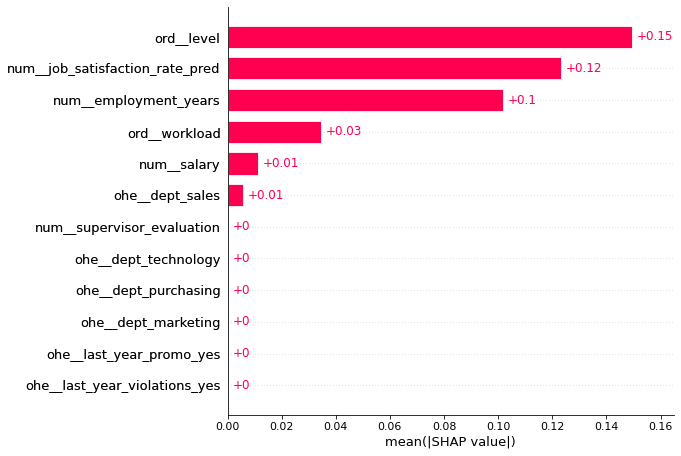

In [131]:
explainer = shap.PermutationExplainer(randomized_search.best_estimator_.named_steps['models'].predict_proba, X_test_transformed)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
explainer.feature_names = feature_names
shap_values_ = explainer(X_test_transformed)
shap.plots.bar(shap_values_[:,:,1], max_display=16)

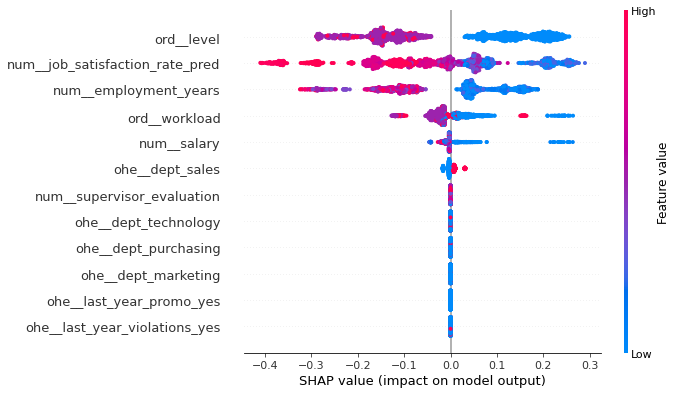

In [132]:
shap.plots.beeswarm(shap_values_[:,:,1], max_display=16) 

<b>Наиболее значимые признаки - это уровень должности, уровень удволетворения работой, и стаж в компании.</b>

<b>Вывод: мы решили вторую задачу и обучили модель определять, уволится сотрудник или нет. Лучшей моделью оказалось дерево решений из-за своей невероятной гибкости гиперпараметров.</b>

# Общие выводы

Мы выполнили большую работу по уменьшению оттока сотрудников из компании "Работа с заботой".

Сначала мы построили модель, которая определяет уровень удовлетворённости работой сотрудника.

* Загрузка данных
        Загрузили три датасета: 
        train_job_satisfaction_rate.csv — состоит из 4000 строк и 10 столбцов
        test_features.csv — состоит из 2000 строк и 9 столбцов
        test_target_job_satisfaction_rate.csv — состоит из 2000 строк и 2 столбцов
        
* Предобработка данных
        Выяснили, что неявные и явные дубликаты отсутствуют, заменили значения " " на nan
        
        
* Исследовательский анализ данных
        Провели исследовательский анализ данных, данные выглядят достоверно, сильных выбросов обнаружено не было, мультиколлинеарности тоже обнаружено не было.


* Подготовка данных
        Использовали пайплайн, чтобы провести подготовку данных: масштабирование, кодирование и т.п.
* Обучение моделей
        Обучили две модели регрессии: дерево решений и логистическую регрессию. Лучшей моделью оказалось дерево решений из-за гибкости своих гиперпараметров. Метрика SMAPE на тренировочных данных состовляла 15.227915623420056, а на тестовых данных 13.739908117885552, что отлично.

Затем мы построили модель, которая определяет, уволится сотрудник или нет.

* Загрузка данных
        Загрузили три датасета: 
        train_quit.csv — состоит из 4000 строк и 10 столбцов
        test_features.csv — состоит из 2000 строк и 9 столбцов
        test_target_quit.csv — состоит из 2000 строк и 2 столбцов
        
        
* Предобработка данных
         Выяснили, что неявные и явные дубликаты отсутствуют, заменили значения " " на nan
         
         
* Исследовательский анализ данных
         Посмотрели на распределение признаков, оно оказалось таким же, как и в первых датасетах. Построили портрет типичного уволившегося сотрудника (сотрудник с уровнем junior, с низкой загруженностью и недавно работающие в компании). Выяснили, что уровень удовлетворённостью работой сильно кореллирует с тем, уволится сотрудник или нет.
         
         
* Добавление нового входного признака
        Добавили уровень удовлетворённости работой в датасет
        
        
* Подготовка данных
        Подготовили признаки с помощью пайплайнов.
* Обучение моделей
        Обучили четыре модели: KNeighborsClassifier, DecesionTreeClassifier, Logistic Regression, SVC. Лучшей моделью оказалось дерево решений из-за гибкости своих гиперпараметров. Метрика roc-auc на тренировочных данных составляла 0.9009966047392611, а на тестовых данных она составляла 0.9127094075347203, что отлично.


<b>Пожелания компании: нужно следить за уровнем удовлетворённости работой сотрудников, чтобы они не увольнялись. Нужно повышать зарплату, возможно, добавить какие-нибудь бонусы при трудоустройстве, предлагать повышение почаще.</b>